### This file shall be used to plot the distribution of total precipitations in August

The main question is to choose which data to select to plot the distribution, if we take the maximum only,
we will miss a lot of informations, but selecting all data makes us loose the independance.

For now I'll only plot the max distributions and then I'll look into the statistics poly to search for solutions.

In [1]:
import sys

sys.path.append('/nird/projects/NS9873K/emile/unseen-storm-forecasts/python_mapping/')
sys.path.append('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/python_mapping/')

import numpy as np, xarray as xr
import matplotlib.pyplot as plt
import weatherdata as wd
import pickle

Loading the weatherset

In [2]:
wsPath = '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/continuous_0.5.pkl'

with open(wsPath, 'rb') as inp:
    tpSet = pickle.load(inp)

Function to plot the distributions

In [3]:
def plot_distribution(data:xr.DataArray, title, path, step=0.001) :
    """
    Plots the statistical distribution of the data.
    The data is regrouped into nearest values with a step of 1 mm.
    
    Parameters:
    data (xr.DataArray): Input data with dimensions "years" and coordinates as strings.
    """
    
    # Flatten the data to a 1D array
    flattened_data = data.values.flatten()
    
    # Define bin edges with a step of 0.001
    bin_edges = np.arange(np.nanmin(flattened_data), np.nanmax(flattened_data) + step, step)
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(flattened_data, bins=bin_edges, edgecolor='black', alpha=0.7)
    
    plt.xlabel('Precipitations (m)')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.savefig(path)

    plt.show()

Distribution of maximums

In [4]:
# Importing data
data = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-daily_0.5_monthly-max')

# Selecting August's maxs
data = data.sel(months='aug').drop_vars("months")

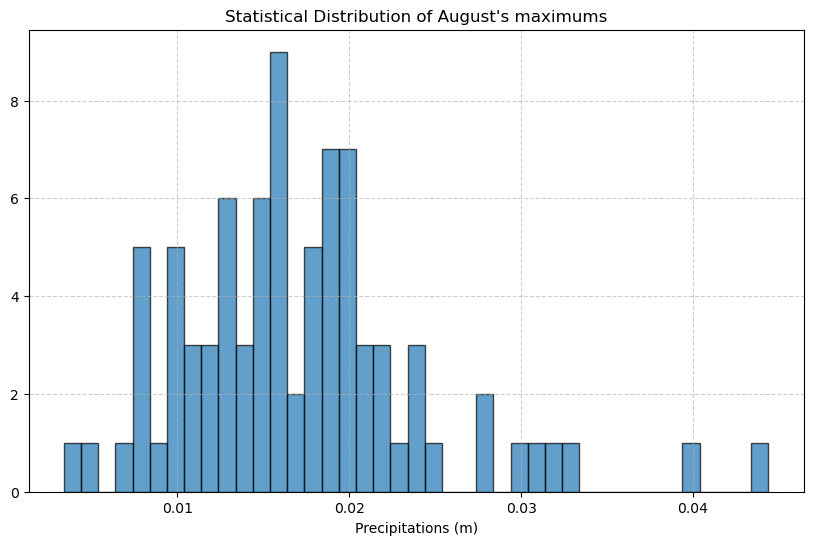

In [5]:
# Plotting
plot_distribution(data, "Statistical Distribution of August's maximums", '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/distrib-august_daily_max-hans_area.png')

Distribution of means over 2 days maximums

In [6]:
# Importing data
mean2 = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean2_0.5_monthly-max')

# Selecting August's maxs
mean2 = mean2.sel(months='aug').drop_vars("months")

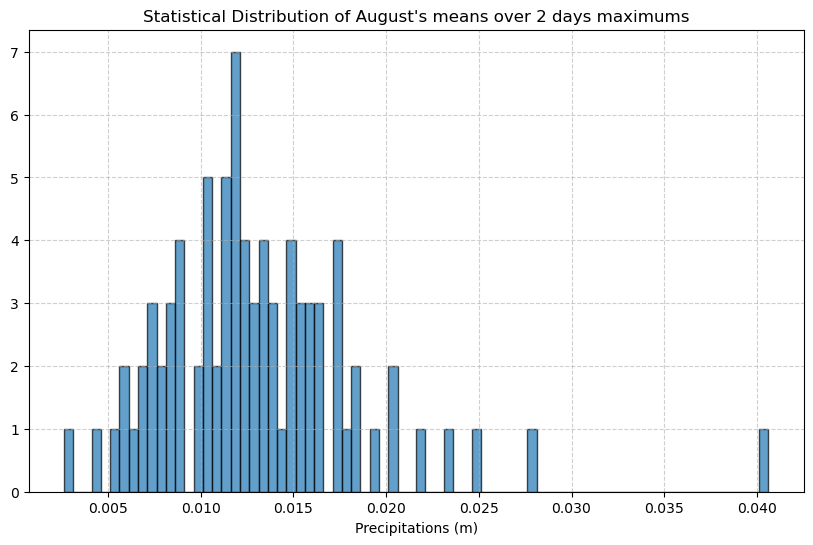

In [7]:
# Plotting
plot_distribution(mean2, "Statistical Distribution of August's means over 2 days maximums", '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/distrib-august_mean2_max-hans_area.png', 5e-4)

Distributions of means over 3 days' maximums

In [8]:
# Importing data
mean3 = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean3_0.5_monthly-max')

# Selecting August's maxs
mean3 = mean3.sel(months='aug').drop_vars("months")

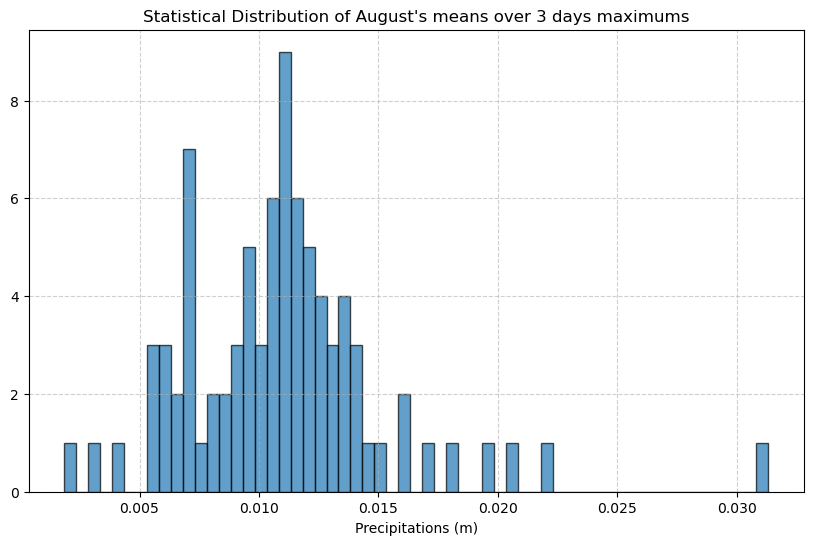

In [9]:
# Plotting
plot_distribution(mean3, "Statistical Distribution of August's means over 3 days maximums", '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/distrib-august_mean3_max-hans_area.png', 5e-4)